## Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
import sys
from pathlib import Path

# Agregar la carpeta raíz al path para poder importar
carpeta_raiz = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
sys.path.append(str(carpeta_raiz))

# Importar las funciones
from funciones_save_load import guardar_parquet, cargar_parquet

# Usar las funciones
icfes = cargar_parquet("icfes.parquet")
icfes.sample(6)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
253841,TI,COLOMBIA,M,2003 Jun 13 12:00:00 AM,20204,SB11202040035715,ESTUDIANTE,COLOMBIA,No,ATLANTICO,8.0,SOLEDAD,8758.0,Estrato 1,3 a 4,Tres,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,Si,None,No,No,Si,Si,No,None,11 A 25 LIBROS,3 a 5 veces por semana,3 a 5 veces por semana,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,732495,108758800429,INSTITUCION EDUCATIVA GABRIEL ESCORCIA GRAVINI...,MIXTO,OFICIAL,A,None,None,108758800429,INSTITUCION EDUCATIVA GABRIEL ESCORCIA GRAVINI...,S,URBANO,UNICA,8758,SOLEDAD,8,ATLANTICO,N,8758.0,SOLEDAD,ATLANTICO,8.0,43,21,2,45,31,2,40,25,1,34,12,1,33.0,6,A-,200,17,52.321475,3.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD
265187,TI,COLOMBIA,M,2001 Feb 15 12:00:00 AM,20204,SB11202040380217,ESTUDIANTE,COLOMBIA,No,TOLIMA,73.0,AMBALEMA,73030.0,Estrato 1,5 a 6,Dos,Ninguno,Secundaria (Bachillerato) incompleta,"Es agricultor, pesquero o jornalero","Es agricultor, pesquero o jornalero",No,No,No,No,No,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,Nunca o rara vez comemos eso,Igual,30 minutos o menos,30 minutos o menos,Entre 11 y 20 horas,"Si, en efectivo",15966,173030000066,INSTITUCION EDUCATIVA NICANOR VELASQUEZ ORTIZ,MIXTO,OFICIAL,A,N,ACADÉMICO,173030000058,EGIDIO PONCE,N,URBANO,MAÑANA,73030,AMBALEMA,73,TOLIMA,N,73408.0,LÉRIDA,TOLIMA,73.0,45,25,2,43,26,2,35,11,1,45,43,2,30.0,2,A-,205,21,27.998128,1.0,2.0,PUBLICAR,NO
455639,CC,COLOMBIA,M,2001 Oct 25 12:00:00 AM,20204,SB11202040385632,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,11.0,BOGOTÁ D.C.,11001.0,Estrato 5,3 a 4,Dos,Educación profesional completa,Postgrado,Pensionado,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,Si,26 A 100 LIBROS,Todos o casi todos los días,1 o 2 veces por semana,Todos o casi todos los días,Mejor,Más de 2 horas,Más de 3 horas,0,No,63883,311001076758,LICEO VAL (VIDA-AMOR-LUZ),MIXTO,NO OFICIAL,A,N,ACADÉMICO,311001076758,LIC VAL (VIDA-AMOR-LUZ),S,URBANO,COMPLETA,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001.0,BOGOTÁ D.C.,BOGOTÁ,11.0,47,31,2,48,39,2,47,47,2,49,53,2,46.0,55,A-,238,45,71.864871,4.0,4.0,PUBLICAR,NO
388306,TI,COLOMBIA,F,2003 Mar 01 12:00:00 AM,20204,SB11202040116469,ESTUDIANTE,COLOMBIA,No,CAUCA,19.0,BUENOS AIRES,1911

## 1. Analisis Inicial de Datos

### 1.1 Dimensiones del Dataset

In [3]:
#=======================================
# DIMENSIONES DEL DATASET
#=======================================

print(f'El dataset tiene un total de {icfes.shape[0]} filas y {icfes.shape[1]} columnas')
print(icfes.shape)

El dataset tiene un total de 504872 filas y 81 columnas
(504872, 81)


### 1.2 Eliminar Variables Inútiles

In [4]:
icfes.sample(6)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
127698,TI,COLOMBIA,F,2003 Jul 23 12:00:00 AM,20204,SB11202040126837,ESTUDIANTE,COLOMBIA,No,TOLIMA,73.0,ROVIRA,73624.0,Estrato 1,3 a 4,Tres,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,Es vendedor o trabaja en atención al público,Tiene un trabajo de tipo auxiliar administrati...,No,No,Si,No,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,3 a 5 veces por semana,Igual,30 minutos o menos,Más de 3 horas,Entre 11 y 20 horas,No,16501,173624000015,INSTITUCION EDUCATIVA FRANCISCO DE MIRANDA,MIXTO,OFICIAL,A,N,ACADÉMICO,173624000015,I.E. FRANCISCO DE MIRANDA - SEDE PRINCIPAL,S,URBANO,MAÑANA,73624,ROVIRA,73,TOLIMA,N,73624.0,ROVIRA,TOLIMA,73.0,52,51,3,63,84,3,52,66,2,50,57,2,41.0,34,A-,266,65,46.555427,2.0,2.0,PUBLICAR,NO
369283,TI,COLOMBIA,M,2004 Feb 28 12:00:00 AM,20204,SB11202040015797,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,11.0,BOGOTÁ D.C.,11001.0,Estrato 2,5 a 6,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,Si,Si,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,Entre 30 y 60 minutos,0,No,75515,311001079901,COL LORENZO DE ALCANTUZ,MIXTO,NO OFICIAL,A,N,ACADÉMICO,311001079901,COL LORENZO DE ALCANTUZ,S,URBANO,COMPLETA,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001.0,BOGOTÁ D.C.,BOGOTÁ,11.0,49,40,2,48,42,2,53,67,2,54,69,2,50.0,69,A1,255,57,62.649136,3.0,3.0,PUBLICAR,NO
210656,TI,COLOMBIA,M,2004 Feb 16 12:00:00 AM,20204,SB11202040487688,ESTUDIANTE,COLOMBIA,No,BOLIVAR,13.0,MARGARITA,13440.0,Estrato 1,3 a 4,Uno,Secundaria (Bachillerato) completa,Primaria completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,No,No,No,Si,No,MÁS DE 100 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 30 y 60 minutos,0,No,73791,213440000618,I.E. DE CHILLOA,MIXTO,OFICIAL,A,N,ACADÉMICO,213440000618,I.E. DE CHILLOA - SEDE PRINCIPAL,S,RURAL,MAÑANA,13440,MARGARITA,13,BOLIVAR,N,47318.0,GUAMAL,MAGDALENA,47.0,44,22,2,42,22,2,38,18,1,33,9,1,36.0,15,A-,195,15,42.757757,2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD
441545,TI,COLOMBIA,M,2003 Dec 20 12:00:00 AM,20204,SB112

In [5]:
icfes.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',


In [6]:
vars_eliminar = ['PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 'ESTU_DEPTO_RESIDE', 
                 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
                 'COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO', 'ESTU_PAIS_RESIDE',
                 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE', 'COLE_NOMBRE_SEDE',
                 'COLE_COD_MCPIO_UBICACION', 'COLE_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION', 
                 'COLE_DEPTO_UBICACION', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_COD_MCPIO_PRESENTACION', 
                 'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_ESTADOINVESTIGACION', 'ESTU_GENERACION-E']

icfes.drop(vars_eliminar, axis=1, inplace=True)

print(f"Columnas después de eliminar: {icfes.shape[1]}")
icfes.sample(5)

Columnas después de eliminar: 59


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
276605,TI,COLOMBIA,M,2002 Sep 14 12:00:00 AM,No,Estrato 4,3 a 4,Cuatro,Postgrado,Postgrado,"Trabaja como profesional (por ejemplo médico, ...","Trabaja como profesional (por ejemplo médico, ...",Si,Si,Si,Si,Si,Si,No,Si,11 A 25 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,Nunca o rara vez comemos eso,Igual,30 minutos o menos,Más de 3 horas,Entre 11 y 20 horas,No,MIXTO,NO OFICIAL,A,N,ACADÉMICO,S,URBANO,COMPLETA,VILLAVICENCIO,META,61,81,3,64,87,3,60,87,3,65,92,3,45.0,49,A-,306,87,73.300590,4.0,4.0
423092,TI,COLOMBIA,F,2001 Jul 24 12:00:00 AM,No,Estrato 3,5 a 6,Cinco,Ninguno,Ninguno,"Es agricultor, pesquero o jornalero",Es vendedor o trabaja en atención al público,Si,None,Si,Si,Si,No,Si,No,11 A 25 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,NOCHE,JERICÓ,ANTIOQUIA,39,11,2,42,23,2,37,16,1,31,6,1,39.0,27,A-,187,10,45.425572,2.0,2.0
83809,TI,COLOMBIA,M,2003 Jun 22 12:00:00 AM,No,Estrato 1,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,"Trabaja en el hogar, no trabaja o estudia",Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,No,Si,Si,11 A 25 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,3 a 5 veces por semana,Peor,No leo por entretenimiento,Entre 30 y 60 minutos,0,No,MIXTO,OFICIAL,A,None,ACADÉMICO,S,URBANO,MAÑANA,SANTA MARTA,MAGDALENA,55,60,3,48,39,2,52,65,2,45,44,2,28.0,1,A-,242,47,55.326009,3.0,2.0
329788,TI,COLOMBIA,M,2003 Nov 28 12:00:00 AM,No,Estrato 2,3 a 4,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Pensionado,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,Si,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Mejor,Entre 30 y 60 minutos,Más de 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,MAÑANA,IBAGUÉ,TOLIMA,67,93,4,80,100,4,66,96,3,73,99,4,68.0,94,B1,356,99,63.712551,3.0,3.0
176320,TI,COLOMBIA,F,2002 Apr 16 12:00:00 AM,No,Estrato 1,7 a 8,Cuatro,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,No,No,No,No,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,3 a 5 veces por semana,Igual,30 minutos o menos,Más de 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,MAÑANA,PASTO,NARIÑO,55,59,3,39,17,2,46,43,2,50,57,2,47.0,60,A-,237,44,46.931923,2.0,2.0


In [7]:
icfes.shape

(504872, 59)

In [8]:
resumen = icfes.dtypes.value_counts().reset_index()
resumen.columns = ['Tipo de dato', 'Cantidad de columnas']
resumen = resumen.sort_values(by='Cantidad de columnas')
print(resumen.to_string(index=False))

Tipo de dato  Cantidad de columnas
     float64                     4
       int64                    15
      object                    40


### 1.3 Tipos de Datos Asignados

In [9]:
# Numéricas
num_vars = icfes.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("\nVariables numéricas:", len(num_vars))
print(num_vars)

# Categóricas
cat_vars = icfes.select_dtypes(include=["object"]).columns.tolist()
print("\nVariables categóricas:", len(cat_vars))
print(cat_vars)

# Booleanas
bools_vars = icfes.select_dtypes(include=["bool"]).columns.tolist()
print("\nVariables booleanas:", len(bools_vars))
print(bools_vars)

# Fechas
fecha_vars = icfes.select_dtypes(include=["datetime"]).columns.tolist()
print("\nVariables de tipo fecha:", len(fecha_vars))
print(fecha_vars)


Variables numéricas: 19
['PUNT_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS', 'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PERCENTIL_INGLES', 'PUNT_GLOBAL', 'PERCENTIL_GLOBAL', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO']

Variables categóricas: 40
['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_TIENEETNIA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_NUMLIBROS', 'FAMI_COMELEC

In [10]:
# Extrae solo los primeros 4 caracteres (el año)
icfes['ESTU_FECHANACIMIENTO'] = pd.to_numeric(
    icfes['ESTU_FECHANACIMIENTO'].str[:4], 
    errors='coerce'
)

icfes.sample(6)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
405590,TI,COLOMBIA,M,2003,No,Estrato 1,5 a 6,Cuatro,Técnica o tecnológica completa,Educación profesional completa,Tiene un trabajo de tipo auxiliar administrati...,"Trabaja como profesional (por ejemplo médico, ...",Si,Si,Si,Si,Si,No,No,Si,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Igual,No leo por entretenimiento,Entre 1 y 3 horas,0,No,MIXTO,NO OFICIAL,A,N,ACADÉMICO,S,URBANO,COMPLETA,SOACHA,CUNDINAMARCA,59,74,3,59,75,3,63,92,3,66,93,3,61.0,89,A2,308,88,66.781748,4.0,3.0
37411,TI,COLOMBIA,F,2003,No,Estrato 2,1 a 2,Tres,Educación profesional completa,Técnica o tecnológica completa,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",Si,No,No,No,Si,No,No,No,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,1 o 2 veces por semana,Peor,30 minutos o menos,Más de 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,MAÑANA,RIOHACHA,LA GUAJIRA,51,44,3,44,30,2,43,36,2,46,46,2,47.0,57,A-,230,39,50.089065,2.0,2.0
442328,CC,COLOMBIA,M,2002,No,Estrato 2,3 a 4,Dos,Secundaria (Bachillerato) completa,Educación profesional completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja como profesional (por ejemplo médico, ...",Si,Si,Si,Si,No,No,Si,Si,26 A 100 LIBROS,Todos o casi todos los días,1 o 2 veces por semana,1 o 2 veces por semana,Mejor,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,NO OFICIAL,A,None,None,S,URBANO,SABATINA,GUARNE,ANTIOQUIA,48,35,2,59,76,3,50,57,2,51,59,2,44.0,44,A-,257,59,57.612669,3.0,2.0
289102,TI,COLOMBIA,M,2004,No,Estrato 2,3 a 4,Cuatro,Primaria incompleta,Técnica o tecnológica completa,"Trabaja como personal de limpieza, mantenimien...",Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,No,Si,No,0 A 10 LIBROS,Todos o casi todos los días,Nunca o rara vez comemos eso,1 o 2 veces por semana,Igual,No leo por entretenimiento,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,UNICA,VALLEDUPAR,CESAR,55,62,3,57,68,3,53,68,2,49,55,2,40.0,31,A-,262,62,52.606728,3.0,3.0
453067,TI,COLOMBIA,M,2002,No,Estrato 2,3 a 4,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,"Trabaja como personal de limpieza, mantenimien...",Es operario de máquinas o conduce vehículos (t...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,N,RURAL,UNICA,LA ESTRELLA,ANTIOQUIA,44,22,2,46,35,2,44,37,2,47,47,2,46.0,54,A-,227,36,50.906861,2.0,3.0
488675,TI,COLOMBIA,M,2003,No,Estrato 1,5 a 6,Cuatro,Secundaria (Bachillerato) incompleta,Educación profesional completa,"Trabaja como profesional (por ejempl

### 1.4 Valores Faltantes

#### Número de filas con al menos un valor faltante

In [11]:
filas_con_na = icfes.isna().any(axis=1).sum()
print(f'El dataset tiene {filas_con_na:,} filas que contienen al menos un valor nulo ({filas_con_na/icfes.shape[0]:.1%} del total)')

El dataset tiene 133,046 filas que contienen al menos un valor nulo (26.4% del total)


#### Número de filas con más del 25% de datos faltantes

In [18]:
# Conteo de NA por fila
filas_na = icfes.isna().sum(axis=1)

# Umbral: más del 25% de las columnas con NA
umbral = icfes.shape[1] * 0.4
incompletas = icfes[filas_na > umbral]

print(f"Filas con más del 40% de valores faltantes: {len(incompletas):,} de {len(icfes):,}")
print(f"Porcentaje de filas incompletas: {len(incompletas)/len(icfes):.2%}")

Filas con más del 40% de valores faltantes: 12,097 de 504,872
Porcentaje de filas incompletas: 2.40%


#### Conteo y Proporción de valores faltantes por variable categórica

In [13]:
conteo_na = icfes.isna().sum()
conteo_na = conteo_na[conteo_na > 0]

na_porcentaje = round((conteo_na / len(icfes)* 100),2)

na_df = pd.DataFrame({'Variable': conteo_na.index, 'Conteo': conteo_na.values, 'Porcentaje': na_porcentaje.values})

na_df = na_df.sort_values(by = 'Porcentaje', ascending = False)
na_df

,Variable,Conteo,Porcentaje
26,COLE_BILINGUE,83007,16.44
20,FAMI_COMECEREALFRUTOSLEGUMBRE,20263,4.01
11,FAMI_TIENECOMPUTADOR,20194,4.00
7,FAMI_TRABAJOLABORPADRE,19691,3.90
14,FAMI_TIENEAUTOMOVIL,17809,3.53
25,ESTU_TIPOREMUNERACION,17646,3.50
8,FAMI_TRABAJOLABORMADRE,17599,3.49
16,FAMI_TIENECONSOLAVIDEOJUEGOS,17478,3.46
13,FAMI_TIENEHORNOMICROOGAS,17142,3.40
15,FAMI_TIENEMOTOCICLETA,17086,3.38


In [14]:
# Inicializar listas vacías
cat_nulos = []
num_nulos = []

# Recorrer todas las columnas del DataFrame
for col in icfes.columns:
    n_nulos = icfes[col].isna().sum()
    
    if n_nulos > 2000:
        if icfes[col].dtype in ['object', 'category']:
            cat_nulos.append((col, n_nulos))
        elif pd.api.types.is_numeric_dtype(icfes[col]):
            num_nulos.append((col, n_nulos))

# Convertir a DataFrame para mejor visualización y ordenarlos
cat_nulos_df = pd.DataFrame(cat_nulos, columns=['Variable', 'Nulos']).sort_values('Nulos', ascending=False)
num_nulos_df = pd.DataFrame(num_nulos, columns=['Variable', 'Nulos']).sort_values('Nulos', ascending=False)

# Imprimir resultados
print(f"\nVariables Categóricas con más de 2000 valores nulos: {len(cat_nulos_df)}")
print(cat_nulos_df.to_string(index=False))

print(f"\nVariables Numéricas con más de 2000 valores nulos: {len(num_nulos_df)}")
print(num_nulos_df.to_string(index=False))


Variables Categóricas con más de 2000 valores nulos: 27
                     Variable  Nulos
                COLE_BILINGUE  83007
FAMI_COMECEREALFRUTOSLEGUMBRE  20263
         FAMI_TIENECOMPUTADOR  20194
       FAMI_TRABAJOLABORPADRE  19691
          FAMI_TIENEAUTOMOVIL  17809
        ESTU_TIPOREMUNERACION  17646
       FAMI_TRABAJOLABORMADRE  17599
 FAMI_TIENECONSOLAVIDEOJUEGOS  17478
     FAMI_TIENEHORNOMICROOGAS  17142
        FAMI_TIENEMOTOCICLETA  17086
      ESTU_HORASSEMANATRABAJA  16984
         FAMI_ESTRATOVIVIENDA  16952
      FAMI_SITUACIONECONOMICA  16314
           FAMI_TIENELAVADORA  16232
            FAMI_CUARTOSHOGAR  15839
         FAMI_TIENESERVICIOTV  15439
   FAMI_COMECARNEPESCADOHUEVO  15306
           FAMI_PERSONASHOGAR  15173
      ESTU_DEDICACIONINTERNET  14626
 ESTU_DEDICACIONLECTURADIARIA  14481
                COLE_CARACTER  14177
               FAMI_NUMLIBROS  13843
           FAMI_TIENEINTERNET  13665
      FAMI_COMELECHEDERIVADOS  13628
          FAMI_EDU

#### Gráfico de valores faltantes

<Axes: >

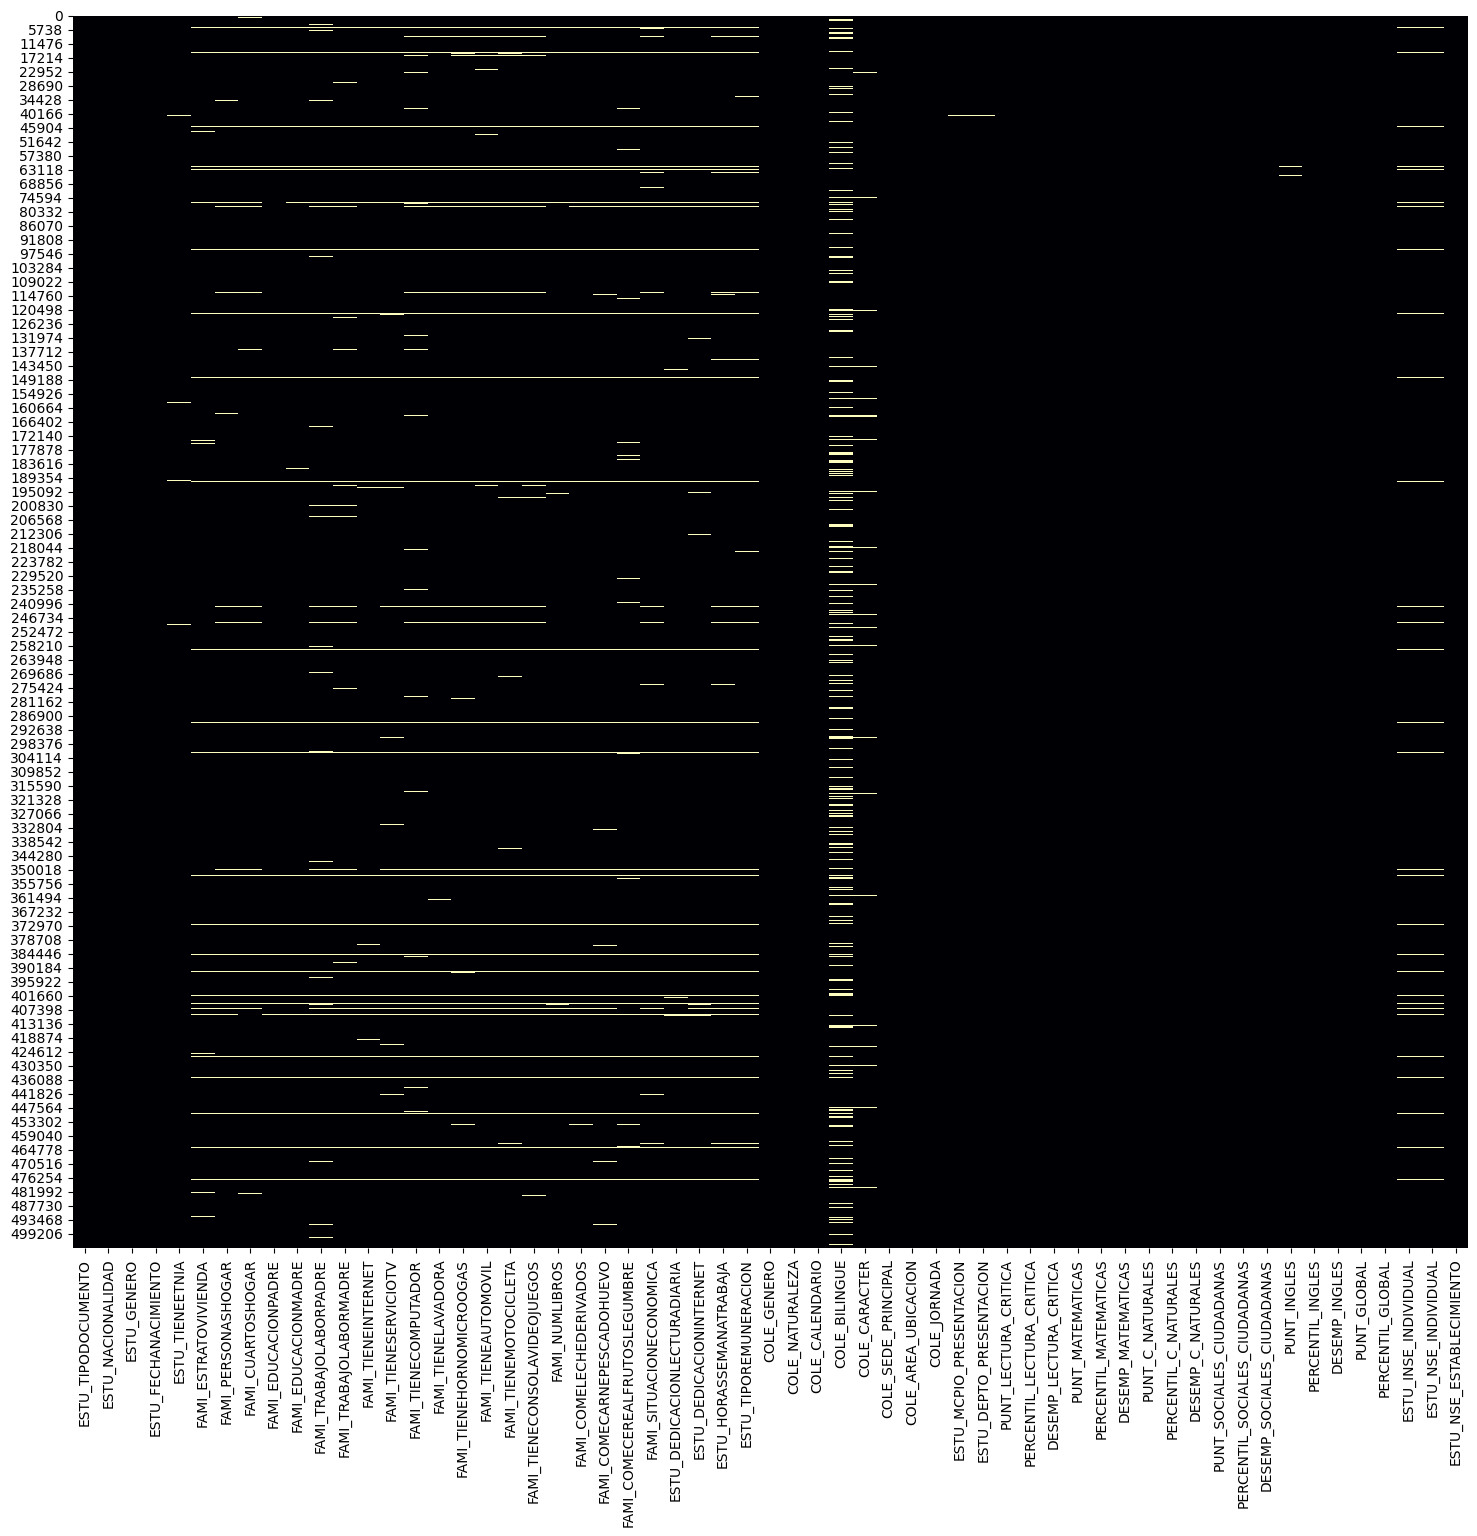

In [15]:
plt.figure(figsize=(18, 16))
sns.heatmap(icfes.isnull(),cmap = 'magma',cbar = False)

### 1.5 Cardinalidad de las Variables

#### Número de categorías únicas y Top 5 categorías

In [16]:
cat_vars = icfes.select_dtypes(include=['object'])

for col in cat_vars.columns:
    print(f"\nVariable: {col} ({cat_vars[col].nunique()} categorías únicas)")
    print(cat_vars[col].value_counts().head(5))  # top 5 categorías


Variable: ESTU_TIPODOCUMENTO (11 categorías únicas)
ESTU_TIPODOCUMENTO
TI     413514
CC      83373
CR       4923
NES      1454
CE       1096
Name: count, dtype: int64

Variable: ESTU_NACIONALIDAD (47 categorías únicas)
ESTU_NACIONALIDAD
COLOMBIA          501708
VENEZUELA           2927
ESTADOS UNIDOS        46
ECUADOR               37
ESPAÑA                29
Name: count, dtype: int64

Variable: ESTU_GENERO (2 categorías únicas)
ESTU_GENERO
F    276572
M    228292
Name: count, dtype: int64

Variable: ESTU_TIENEETNIA (2 categorías únicas)
ESTU_TIENEETNIA
No    469938
Si     31941
Name: count, dtype: int64

Variable: FAMI_ESTRATOVIVIENDA (7 categorías únicas)
FAMI_ESTRATOVIVIENDA
Estrato 2      182322
Estrato 1      152852
Estrato 3      103550
Estrato 4       23463
Sin Estrato     15631
Name: count, dtype: int64

Variable: FAMI_PERSONASHOGAR (5 categorías únicas)
FAMI_PERSONASHOGAR
3 a 4      240082
5 a 6      155486
7 a 8       41144
1 a 2       36691
9 o más     16296
Name: count, dt

#### Porcentaje relativo de cada categoría en variables categóricas

In [17]:
for col in cat_vars:
    print(f"\nDistribución porcentual de '{col}':")
    print(icfes[col].value_counts(normalize=True).mul(100).round(3).astype(str) + '%')


Distribución porcentual de 'ESTU_TIPODOCUMENTO':
ESTU_TIPODOCUMENTO
TI      81.905%
CC      16.514%
CR       0.975%
NES      0.288%
CE       0.217%
PEP      0.083%
PE       0.015%
RC       0.003%
PC       0.001%
V          0.0%
NUIP       0.0%
Name: proportion, dtype: object

Distribución porcentual de 'ESTU_NACIONALIDAD':
ESTU_NACIONALIDAD
COLOMBIA                           99.373%
VENEZUELA                            0.58%
ESTADOS UNIDOS                      0.009%
ECUADOR                             0.007%
ESPAÑA                              0.006%
CUBA                                0.002%
PERÚ                                0.002%
ARGENTINA                           0.002%
BRASIL                              0.002%
COSTA RICA                          0.001%
VANUATU                             0.001%
PANAMÁ                              0.001%
MÉXICO                              0.001%
URUGUAY                             0.001%
GUATEMALA                           0.001%
HONDURAS   

### 1.6 Resumen Final

---

#### **Número de Variables**

Se eliminaron variables que no aportan nada al entrenamiento del modelo. La selección de las variables es arbitraria y por conocimiento de los datos.

Entre las variables descartadas se incluyen:
- **`PERIODO`** → Año de presentación del examen (2020), es el mismo para todos.
- **Códigos del DANE** (departamentos, colegios, etc.) → No tienen valor predictivo.
- **Departamentos y Municipios** → Por redundancia, se eliminaron departamentos y municipios de residencia del estudiante y ubicación del colegio, se dejó solamente el municipio y departamento donde se presentó el examen
- **Datos personales o administrativos** → Tipo de documento, país de residencia (no nacionalidad), condición de reclusión, proceso judicial.  
- **`ESTU_GENERACIONE` (beca)** → Representa *data leakage*, pues depende directamente del puntaje obtenido en el examen.

---

#### **Dimensiones del Dataset**

Después de la depuración, el dataset queda conformado por:

- **504.872 observaciones (filas)**  
- **59 variables (columnas)**  

---

#### **Tipos de Variables**

El dataset contiene tres tipos principales de variables:

| Tipo de Variable | Cantidad |
|------------------|-----------|
| Numéricas        | 20        |
| Categóricas      | 39        |
| **Total**        | 59        |

---

#### **Cardinalidad de Variables Categóricas**

Las variables con **mayor cardinalidad** son aquellas con **componente geográfico**, como:

- Municipio y departamento de residencia.  
- Variables de pertenencia étnica.  
- Actividad laboral de los padres del estudiante.  
- Nivel educativo de los padres.

---

#### **Valores Faltantes**

- Se identificaron **133,046 filas con al menos un valor nulo**.
- Hay **12,097 filas** con el 40% de datos faltantes.
- Las variables con **más valores faltantes** corresponden principalmente a **preguntas de consumo o uso de recursos**, como:
  - Tiempo dedicado a Internet.  
  - Consumo de cereales, carne o productos lácteos.  

> Este análisis es preliminar: solo considera el conteo de valores nulos.  
> Sin embargo, a priori, muchos parecen ser **faltantes MAR (Missing At Random)**.  
> Por ejemplo, la ausencia de respuesta en “tiempo dedicado a Internet” puede deberse a que el hogar **no posee conexión o dispositivos**.

---

✅ **Resumen General**

| Aspecto                     | Resultado |
|-----------------------------|------------|
| Observaciones               | 504,872    |
| Variables totales           | 59         |
| Variables numéricas          | 20         |
| Variables categóricas        | 39         |
| Filas con valores nulos     | 133,046    |

---

### 1.7 Guardar Archivo 

In [21]:
from funciones_save_load import guardar_parquet

guardar_parquet(icfes, "icfes_carga_inicial.parquet")

Archivo guardado en: C:\Users\CACTU\Downloads\Proyectos\icfes-app\data\icfes_carga_inicial.parquet


WindowsPath('C:/Users/CACTU/Downloads/Proyectos/icfes-app/data/icfes_carga_inicial.parquet')